In [8]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import tqdm
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.nn.utils.rnn import pack_sequence, pad_sequence, pack_padded_sequence, pad_packed_sequence

In [2]:
class GRUNet(nn.Module):
    def __init__(self):
        super(GRUNet, self).__init__()
        
        self.gru = nn.GRU(1,16,2)
        self.fc = nn.Linear(16,1)
        
    def forward(self, x, h = None):
        x, h = self.gru(x, h)
        x = self.fc(x)
        return x, h
    
    def initHidden(self, batch_size):
        return torch.zeros((2, batch_size, 16))

In [19]:
def gen_data():
    start = torch.randint(0, 400, (1,))[0]
    size = torch.randint(50, 100, (1,))[0]
    
    data = torch.arange(start, start + size, dtype = torch.float32)
    data = torch.sin(data) + torch.randn(size) * 0.01
#     data = torch.log(data)
    data = data.reshape(-1,1,1)
    
    return data.cuda()

In [20]:
model = GRUNet().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [22]:
pbar = tqdm.trange(500)
for step in pbar:
    data = gen_data()
    
    optimizer.zero_grad()
    
    out, h = model(data[:-1])
    loss = criterion(out, data[1:])
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        pbar.set_description("Loss: %.5f" % loss.item())

Loss: 0.00669: 100%|██████████| 500/500 [00:01<00:00, 278.35it/s]


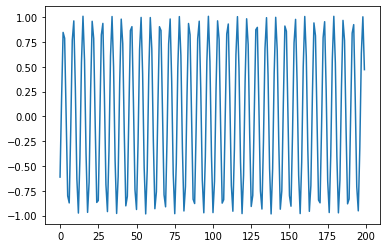

In [89]:
data = gen_data()

initial = 0
out = torch.zeros((200,1,1))
out[:initial] = data[:initial]
hidden = None
hidden = model.initHidden(1).cuda()

for step in range(initial):
    out_, hidden = model(data[step:step+1], hidden)

# out_ *= 0
for step in range(initial,len(out)):
    out_, hidden = model(out_, hidden)
    out[step] = out_[0]
    
plt.plot(out[:,0,0].cpu().detach().numpy())
# plt.show()
# plt.plot(data[:,0,0].cpu().detach().numpy())

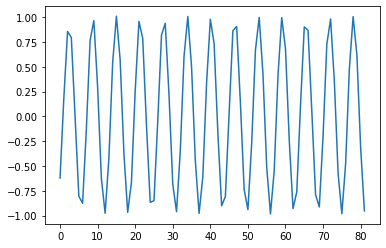

In [49]:
data = gen_data()

out = torch.zeros_like(data)
out[:5] = data[:5]
hidden = None

for step in range(0):
    out_, hidden = model(data[step:step+1], hidden)
    
for step in range(0,len(out)):
    out_, hidden = model(out_, hidden)
    out[step] = out_[0]
    
plt.plot(out[:,0,0].cpu().detach().numpy())
# plt.show()
# plt.plot(data[:,0,0].cpu().detach().numpy())

In [373]:
data = gen_data()

out = torch.zeros_like(data)
out[:5] = data[:5]
hidden = None

for step in range(5,len(out)):
    out_, hidden = model(out[:step])
    out[step] = out_[step]
    
plt.plot(out[:,0,0].cpu().detach().numpy())
# plt.show()
plt.plot(data[:,0,0].cpu().detach().numpy())

IndexError: index 5 is out of bounds for dimension 0 with size 5

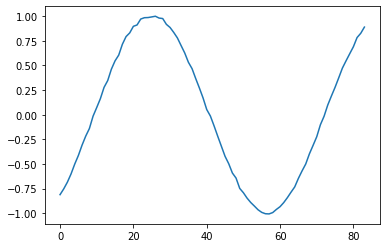

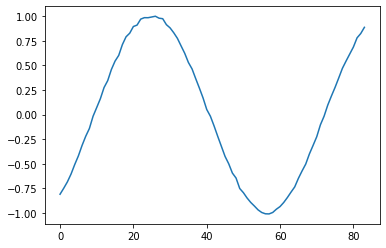

In [370]:
data = gen_data()
out,_ = model(data)

plt.plot(out[:,0,0].cpu().detach().numpy())
plt.show()
plt.plot(data[:,0,0].cpu().detach().numpy())

In [ ]:
dims = 276
norm = np.load('./data/input_norm.npy')

data = out.detach().cpu().numpy()
prediction = Data(data, norm[:,:dims], "input")

frame = SkeletonFrame(prediction[0])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(0,4)

def update_fig(frame_idx):
    frame.data = prediction[frame_idx]
    frame.update_character(graph)
    return [graph]

graph = frame.draw_character(ax)
anim_out = anim.FuncAnimation(fig, update_fig, len(prediction), interval = 1000 / 120., blit=True)
anim_out

In [ ]:
# TEsting the worng way, sequence as input
input = [dataset.test_clips[0][:,:276].cuda()]
out, hidden = model(input)

dims = 276
norm = np.load('./data/input_norm.npy')

data = out[0].detach().cpu().numpy()
prediction = Data(data, norm[:,:dims], "input")

frame = SkeletonFrame(prediction[0])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(0,4)

def update_fig(frame_idx):
    frame.data = prediction[frame_idx]
    frame.update_character(graph)
    return [graph]

graph = frame.draw_character(ax)
anim_out = anim.FuncAnimation(fig, update_fig, len(prediction), interval = 1000 / 120., blit=True)
anim_out